# Heart Atlas Analysis

In [1]:
import scvi
import scanpy as sc
from sklearn.cluster import KMeans

Global seed set to 0


In [2]:
adata = scvi.data.heart_cell_atlas_subsampled()
adata.obs

INFO     File data/hca_subsampled_20k.h5ad already downloaded                                
INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 18641 cells, 26662 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,source,type,version,cell_states,Used,_scvi_batch,_scvi_labels
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,LA,HCAHeart7844001,0.113475,CD45+,DCD,V2,LYVE1+MØ1,Yes,0,0
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,RV,HCAHeart7829979,0.085546,Nuclei,DCD,V2,vCM1,Yes,0,0
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,RA,HCAHeart7702879,0.197861,Nuclei,DCD,V2,FB2,Yes,0,0
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,LA,HCAHeart8102858,0.113475,CD45+,DCD,V3,EC10_CMC-like,Yes,0,0
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,RA,HCAHeart8102863,0.132150,Cells,DCD,V3,EC5_art,Yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,RV,HCAHeart7985087,0.185751,Nuclei,DBD,V2,vCM1,Yes,0,0
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,RV,H0035_RV,0.081779,Nuclei,DBD,V3,PC1_vent,Yes,0,0
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,LA,HCAHeart7844001,0.074830,CD45+,DCD,V2,CD4+T_tem,Yes,0,0
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,LA,HCAHeart7702876,0.048649,Nuclei,DCD,V2,aCM3,Yes,0,0


In [3]:
adata.var

,gene_ids-Harvard-Nuclei,feature_types-Harvard-Nuclei,gene_ids-Sanger-Nuclei,feature_types-Sanger-Nuclei,gene_ids-Sanger-Cells,feature_types-Sanger-Cells,gene_ids-Sanger-CD45,feature_types-Sanger-CD45,n_counts
AL627309.1,ENSG00000238009,Gene Expression,ENSG00000238009,0,ENSG00000238009,0,ENSG00000238009,0,249.0
AC114498.1,ENSG00000235146,Gene Expression,ENSG00000235146,0,ENSG00000235146,0,ENSG00000235146,0,28.0
AL669831.2,ENSG00000229905,Gene Expression,ENSG00000229905,0,ENSG00000229905,0,ENSG00000229905,0,3.0
AL669831.5,ENSG00000237491,Gene Expression,ENSG00000237491,0,ENSG00000237491,0,ENSG00000237491,0,1342.0
FAM87B,ENSG00000177757,Gene Expression,ENSG00000177757,0,ENSG00000177757,0,ENSG00000177757,0,15.0
...,...,...,...,...,...,...,...,...,...
AC007325.2,ENSG00000277196,Gene Expression,ENSG00000277196,0,ENSG00000277196,0,ENSG00000277196,0,68.0
BX072566.1,ENSG00000277630,Gene Expression,ENSG00000277630,0,ENSG00000277630,0,ENSG00000277630,0,4.0
AL354822.1,ENSG00000278384,Gene Expression,ENSG00000278384,0,ENSG00000278384,0,ENSG00000278384,0,476.0
AC004556.1,ENSG00000276345,Gene Expression,ENSG00000276345,0,ENSG00000276345,0,ENSG00000276345,0,151.0


In [4]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.obs

,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,...,type,version,cell_states,Used,_scvi_batch,_scvi_labels,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,...,DCD,V2,LYVE1+MØ1,Yes,0,0,738,1420.0,78.0,5.492958
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,...,DCD,V2,vCM1,Yes,0,0,505,844.0,1.0,0.118483
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,...,DCD,V2,FB2,Yes,0,0,862,1491.0,0.0,0.000000
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,...,DCD,V3,EC10_CMC-like,Yes,0,0,1115,2167.0,139.0,6.414398
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,...,DCD,V3,EC5_art,Yes,0,0,2505,7334.0,686.0,9.353695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,...,DBD,V2,vCM1,Yes,0,0,2243,4478.0,10.0,0.223314
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,...,DBD,V3,PC1_vent,Yes,0,0,630,967.0,2.0,0.206825
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,...,DCD,V2,CD4+T_tem,Yes,0,0,619,1599.0,67.0,4.190119
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,...,DCD,V2,aCM3,Yes,0,0,1523,3715.0,1.0,0.026918


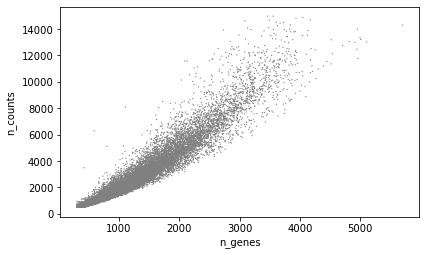

In [5]:
sc.pl.scatter(adata,"n_genes","n_counts")

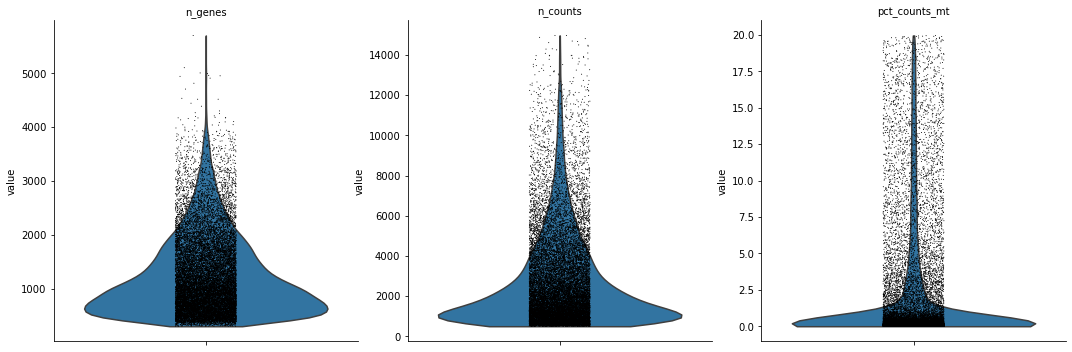

In [6]:
sc.pl.violin(adata,["n_genes","n_counts","pct_counts_mt"],multi_panel=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedd71e5100>,
      dtype=object)

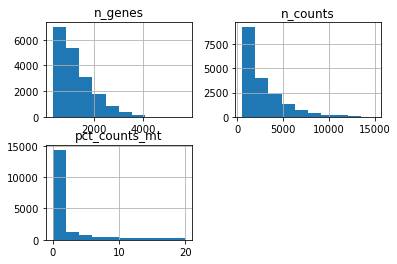

In [7]:
adata.obs.hist(column=["n_genes","n_counts","pct_counts_mt"])

In [8]:
adata.obs

,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,...,type,version,cell_states,Used,_scvi_batch,_scvi_labels,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,...,DCD,V2,LYVE1+MØ1,Yes,0,0,738,1420.0,78.0,5.492958
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,...,DCD,V2,vCM1,Yes,0,0,505,844.0,1.0,0.118483
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,...,DCD,V2,FB2,Yes,0,0,862,1491.0,0.0,0.000000
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,...,DCD,V3,EC10_CMC-like,Yes,0,0,1115,2167.0,139.0,6.414398
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,...,DCD,V3,EC5_art,Yes,0,0,2505,7334.0,686.0,9.353695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,...,DBD,V2,vCM1,Yes,0,0,2243,4478.0,10.0,0.223314
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,...,DBD,V3,PC1_vent,Yes,0,0,630,967.0,2.0,0.206825
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,...,DCD,V2,CD4+T_tem,Yes,0,0,619,1599.0,67.0,4.190119
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,...,DCD,V2,aCM3,Yes,0,0,1523,3715.0,1.0,0.026918


In [9]:
adata=adata[adata.obs["pct_counts_mt"]<10,:].copy()

In [10]:
sc.pp.filter_cells(adata,max_genes=4000)
sc.pp.filter_cells(adata,max_counts=12000)

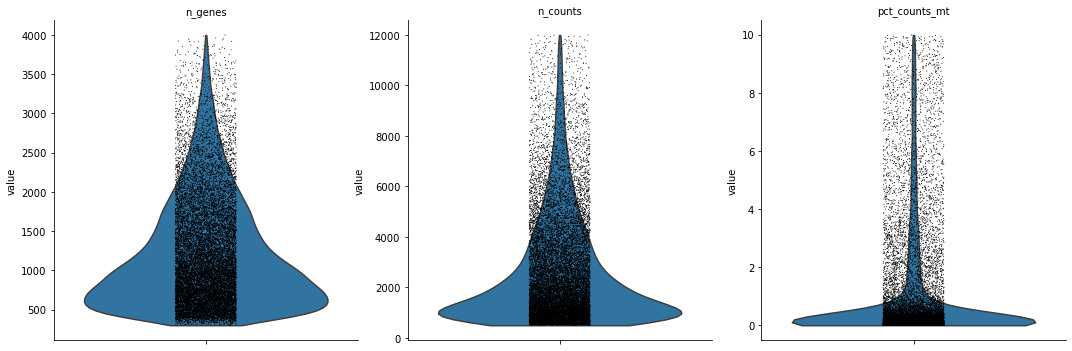

In [11]:
sc.pl.violin(adata,["n_genes","n_counts","pct_counts_mt"],multi_panel=True)

## Normalization

In [12]:
adata.layers["counts"]=adata.X.copy()
sc.pp.normalize_total(adata,target_sum=10000)
sc.pp.log1p(adata)
adata.raw=adata

## Reduction

In [13]:
sc.pp.highly_variable_genes(adata,n_top_genes=2500,layer="counts",flavor="seurat_v3")

In [14]:
sc.pp.pca(adata)
# sc.pp.neighbors(adata,n_neighbors=50)

In [15]:
import scanpy.external as sce
sce.pp.bbknn(adata, batch_key="cell_source")
sc.tl.umap(adata)

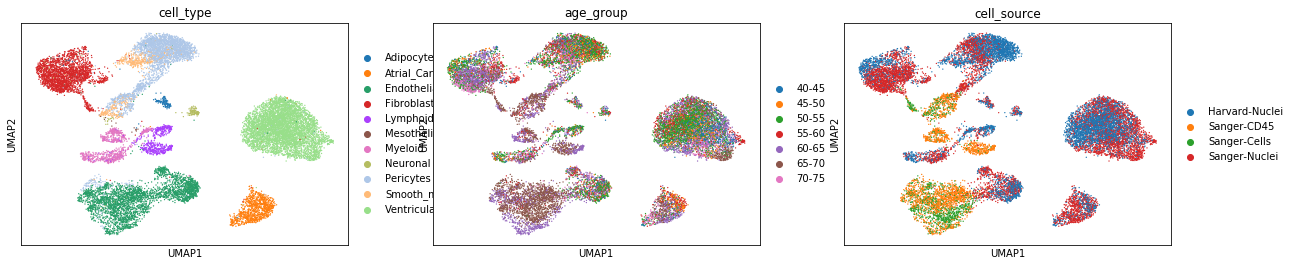

In [16]:
sc.pl.umap(adata,color=["cell_type","age_group","cell_source"])

In [17]:
adata.obs.nunique()

NRP                      2
age_group                7
cell_source              4
cell_type               11
donor                   14
gender                   2
n_counts              5897
n_genes               2864
percent_mito         11377
percent_ribo         11541
region                   6
sample                 145
scrublet_score          78
source                   3
type                     2
version                  2
cell_states             65
Used                     1
_scvi_batch              1
_scvi_labels             1
n_genes_by_counts     2864
total_counts          5897
total_counts_mt        539
pct_counts_mt        11433
dtype: int64

In [44]:
kmeans=KMeans(n_clusters=11,random_state=0).fit(adata.obsm["X_pca"])
adata.obs['kmeans'] = kmeans.labels_.astype(str)

/home/server_crash_/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'kmeans' as categorical


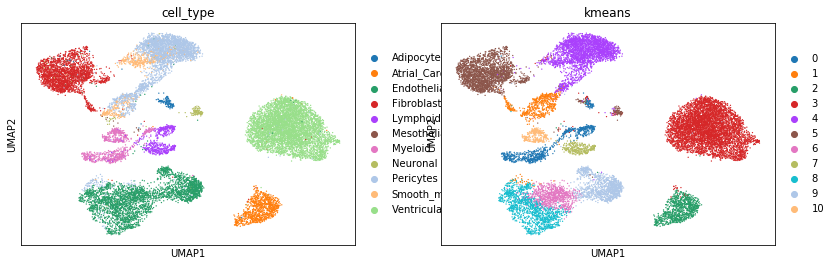

In [45]:
sc.pl.umap(adata,color=['cell_type','kmeans'])

In [47]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score
print("NMI is: ",normalized_mutual_info_score(adata.obs["cell_type"],adata.obs['kmeans']))
print("ARI is: ",adjusted_rand_score(adata.obs["cell_type"],adata.obs['kmeans']))
print("FM is: ",fowlkes_mallows_score(adata.obs["cell_type"],adata.obs['kmeans']))

NMI is:  0.8039164106479356
ARI is:  0.8183218708633927
FM is:  0.8520663650847485


### N=11 (Ground Truth Unique Values)
NMI is:  0.8039164106479356  
ARI is:  0.8183218708633927  
FM is:  0.8520663650847485

### N=12
NMI is:  0.809804653796988  
ARI is:  0.8287255953793068  
FM is:  0.8609869678759524

##### N=12 gives marginally better result